Part 1 - Cross-section data

Question 1: State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.

For OLS estimators to be unbiased we need the expected value of the estimator to be equal to the true parameter value (bias from statistics), there are some conditions that need to be fulfilled:
- Y = βX + ε: a relação entre a variável dependente (Y) e as variáveis independentes (X) devem ser escritas como equações lineares;
- E(ε│X) = 0: meu erro precisa ter média zero e não pode estar relacionado com o regressors X;
- Random sampling (it has to be representative of the population);
- No perfect multicolineatiry: the regressors are not perfectly linearly dependent;
- No autocorrelation: the error terms are not correlated to one another (covariance between two of them has to be zero);
- Homoskedacity: the variance of the error term is constant between observations.


Question 2: Show that under this assumption the OLS estimators are indeed unbiased.

We start with the equation:

$$
Y = X \cdot \beta + U
$$

The OLS estimator is:

$$
\hat{\beta} = (X'X)^{-1}X'Y
$$

Substitute Y into the equation:

$$
\hat{\beta} = (X'X)^{-1}X'(X \cdot \beta + U)
$$

Distribute \( X' \):

$$
\hat{\beta} = (X'X)^{-1}X'X \cdot \beta + (X'X)^{-1}X'U
$$

Simplify:

$$
\hat{\beta} = \beta + (X'X)^{-1}X'U
$$

Take the expectation:

$$
E[\hat{\beta}] = E[\beta + (X'X)^{-1}X'U]
$$

Using the linearity of expectation:

$$
E[\hat{\beta}] = \beta + (X'X)^{-1}X' \cdot E[U]
$$

Assuming the expected value of U is zero:

$$
E[\hat{\beta}] = \beta
$$

Thus, we have an unbiased estimator.


Question 3: Explain the sample selection bias with an example from the course.

RAF planes returning from war zones: the ideia was to look at the planes and add more plating to the region where they needed the most. Problem is, the actual answer was: they needed more plating  where they got shot the least. That’s because there was a sample selection bias: they were looking only at planes that did come back for war zones - that means the regions where the observed planes were hit the most are actually the regions where it is not important to plate since they did survive.

Question 4: Explain the omitted variable bias with an example from the course.

The omitted variable bias happens when there is an omitted (does do appear in the model) and relevant variable influencing the independent and the dependent variables. Now, this variable causes distortions in the results and the model ends up atributing it's effect to the variables already contained in the model. Example: during the investigation of the fertilizer effect on soybean fields, looking solely at the results of the harvesting might be a problem since although the fertilizer most certainly makes a difference, we also have to take in consideration the quality of the soil, climate and pests. So we cannot only look at the fertilizer itself, there are these other ommited variables creating a lot of noise in the investigation and need to be taken in account.

Question 5: Explain the problem of multicollinearity. Is it a problem in this dataset?



Multicollinearity occurs when two or mode regressors are highly correlated. This ends up resulting in unstable coefficient estimates and high variances. See, the variance of the estimator can be calculated this way:

$$
\begin{align}
Var(\hat{\beta} | X) = \sigma ^{2}(X^TX)^{-1}
\end{align}
$$

If we have multicollinearity in X - highly correlated columns - in X, it might be a problem to calculate the inverse of $X^T X$ since $\text{det}(X^T X)$ is approximately zero.

In this dataset we have high multicollinearity as evidenced by the very high condition number ant the correlation matrix as well. We drew a heatmap to evidence witch variables are higly correlated.

In [55]:
import pandas as pd

df = pd.read_csv('HPRICE2.RAW', delim_whitespace=True, decimal='.', header=None)
df = df.apply(pd.to_numeric) 

df = df.rename(columns={
    0: "price",
    1: "crime",
    2: "nox",
    3: "rooms",
    4: "dist",
    5: "radial",
    6: "proptax",
    7: "stratio",
    8: "lowstat",
    9: "lprice",
    10: "lnox",
    11: "lproptax",
})

df

C:\Users\guik2\AppData\Local\Temp\ipykernel_16816\1299624305.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('HPRICE2.RAW', delim_whitespace=True, decimal='.', header=None)


,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678
...,...,...,...,...,...,...,...,...,...,...,...,...
501,22400,0.063,5.73,6.59,2.48,1,27.3,21.0,9.67,10.016820,1.745715,5.609472
502,20600,0.045,5.73,6.12,2.29,1,27.3,21.0,9.08,9.933046,1.745715,5.609472
503,23899,0.061,5.73,6.98,2.17,1,27.3,21.0,5.64,10.081590,1.745715,5.609472
504,22000,0.110,5.73,6.79,2.39,1,27.3,21.0,6.48,9.998797,1.745715,5.609472


Creating the correlation matrix

In [56]:
# creating the correlation matrix
correlation_matrix = df.corr()

# showing correlation matrix
print(correlation_matrix)

             price     crime       nox     rooms      dist    radial  \
price     1.000000 -0.387919 -0.426037  0.695780  0.249339 -0.380837   
crime    -0.387919  1.000000  0.421152 -0.218816 -0.379909  0.625442   
nox      -0.426037  0.421152  1.000000 -0.302828 -0.770222  0.610328   
rooms     0.695780 -0.218816 -0.302828  1.000000  0.205410 -0.209773   
dist      0.249339 -0.379909 -0.770222  0.205410  1.000000 -0.495065   
radial   -0.380837  0.625442  0.610328 -0.209773 -0.495065  1.000000   
proptax  -0.467087  0.582819  0.666981 -0.292120 -0.534379  0.910228   
stratio  -0.503340  0.288691  0.186863 -0.354008 -0.229269  0.464244   
lowstat  -0.726391  0.447033  0.585613 -0.609605 -0.495602  0.476038   
lprice    0.953320 -0.527495 -0.508767  0.632909  0.342008 -0.480971   
lnox     -0.429447  0.429639  0.993943 -0.304988 -0.808795  0.624171   
lproptax -0.473167  0.551393  0.659206 -0.299269 -0.513897  0.863531   

           proptax   stratio   lowstat    lprice      lnox  lpr

Calculation of the condition number from the correlation matrix

Condition Number: 2030.5872016948472


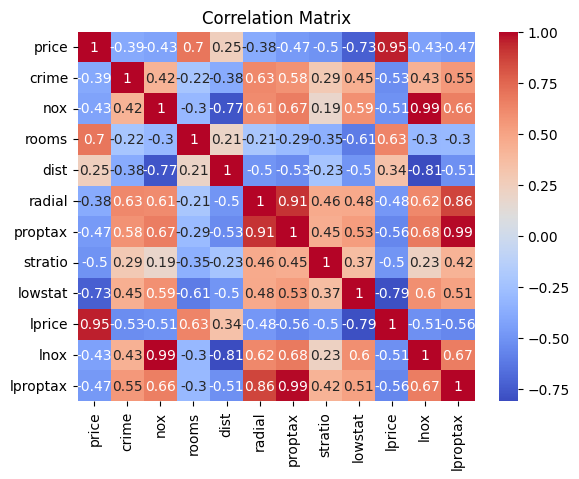

In [57]:
import numpy as np

# calculating eigenvalues of the correlation matrix
eigenvalues = np.linalg.eigvals(correlation_matrix)

# calculating the condition number utilizing the eigenvalues determined before
condition_number = max(eigenvalues) / min(eigenvalues)

# showing condition number
print("Condition Number:", condition_number)

import seaborn as sns
import matplotlib.pyplot as plt

# we can actually see the problematic variables with this plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Question 6: Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%

In [58]:
# creating the nox categories using the defined quantiles
df['nox_Category'] = pd.qcut(
    df['nox'], 
    q=[0, 0.25, 0.75, 1],  
    labels=['Low', 'Medium', 'High'])

# showing updated dataframe
print(df)

     price  crime   nox  rooms  dist  radial  proptax  stratio  lowstat  \
0    24000  0.006  5.38   6.57  4.09       1     29.6     15.3     4.98   
1    21599  0.027  4.69   6.42  4.97       2     24.2     17.8     9.14   
2    34700  0.027  4.69   7.18  4.97       2     24.2     17.8     4.03   
3    33400  0.032  4.58   7.00  6.06       3     22.2     18.7     2.94   
4    36199  0.069  4.58   7.15  6.06       3     22.2     18.7     5.33   
..     ...    ...   ...    ...   ...     ...      ...      ...      ...   
501  22400  0.063  5.73   6.59  2.48       1     27.3     21.0     9.67   
502  20600  0.045  5.73   6.12  2.29       1     27.3     21.0     9.08   
503  23899  0.061  5.73   6.98  2.17       1     27.3     21.0     5.64   
504  22000  0.110  5.73   6.79  2.39       1     27.3     21.0     6.48   
505  11900  0.047  5.73   6.03  2.51       1     27.3     21.0     7.88   

        lprice      lnox  lproptax nox_Category  
0    10.085810  1.682688  5.690360       Medium  

Question 7: Compute for each category of nox level the average median price and comment on your results.

In [59]:
# creating grouping by nox categories using (average) median housing price 
grouped_df = df.groupby('nox_Category')['price'].mean().reset_index()

# showing the created dataframe
print(grouped_df)

  nox_Category         price
0          Low  26977.093750
1       Medium  22741.555118
2         High  17430.653226


C:\Users\guik2\AppData\Local\Temp\ipykernel_16816\3818123462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('nox_Category')['price'].mean().reset_index()


Question 8: Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?

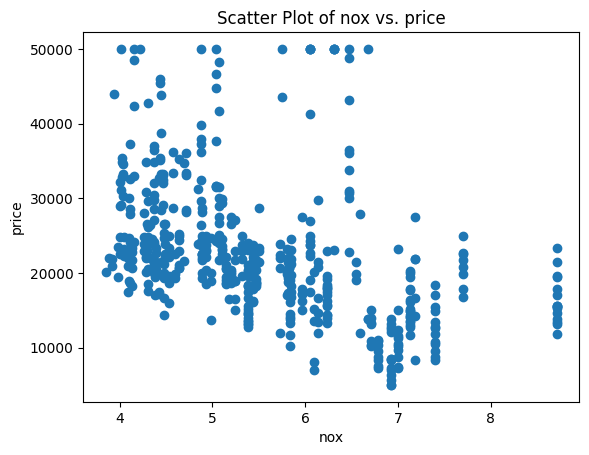

In [60]:
import matplotlib.pyplot as plt

# setting up the scatter plot of nox vs. median housing price
plt.scatter(df['nox'], df['price'])
plt.title('Scatter Plot of nox vs. price')
plt.xlabel('nox')
plt.ylabel('price')

# showing the plot
plt.show()

Question 9: Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.

In [61]:
import statsmodels.api as sm

# this is the dataframe with the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['price']

# running the regression
model = sm.OLS(y, X).fit()

# printing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        11:11:56   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

Interpretation of coeficients:

const: -1.868e+04 -- model predicts this as the value of the median house pricing when all independent variables are set to zero. Of course this does not make any sense, but soo does not setting crime, nox, rooms and proptax to zero. This interpretation is simply nonsense.

crime: -136.5438 -- means a unitary increase in crime commited per capita decreases the median by 136.5438, this makes sense, it makes sense that houses in violent places have less demand (thus less value) than otherwise.

nox: -660.4672 -- means a unitary increase in nox decreases the median by 660.4672, since nox is usually related to air pollution (due to trafic and industries), it makes sense that houses in areas with higher nox are less demanded and therefore cheaper.

rooms: 7797.9286 -- means a unitary increase in rooms increases the median by 7797.9286, more rooms in a house should mean an increase in house pricing. Makes sense, if we take two house batches, with one of them being bigger (cetteris paribus), it is expected that the one with the bigger houses has the higher median.

proptax: -89.4144 -- means a unitary increase in proptax decreases the median by 89.4144, it makes sense that people in a place with higher property taxes (calculated on it's value) would prefer to keep values down in order to pay less taxes.

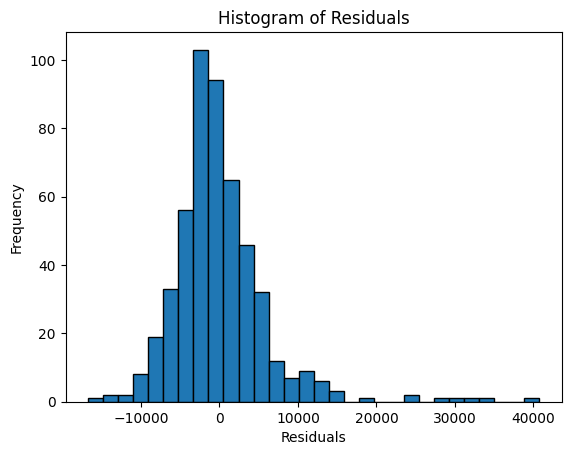

In [62]:
# Get residuals
residuals = model.resid

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


Comments on residuals histogram: this histogram shows that the 



Question 10: Run a regression of lprice on a constant, crime, nox, rooms, proptax. Interpret all coefficients.

In [63]:
import statsmodels.api as sm

# this is the dataframe with the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['lprice']

# running the regression
model = sm.OLS(y, X).fit()

# printing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          2.50e-101
Time:                        11:11:56   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

Question 11: Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Interpret all coefficients.

In [64]:
import statsmodels.api as sm

# this is the dataframe with the independent variables
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['lprice']

# running the regression
model = sm.OLS(y, X).fit()

# printing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.77e-101
Time:                        11:11:56   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

Question 12: In the specification of question 9, test the hypothesis H0: Betanox = 0 vs. H1: Betanox ≠ 0 at the 1% level using the p-value of the test.

In [65]:
import statsmodels.api as sm

# this is the dataframe with the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['price']

# running the regression
model = sm.OLS(y, X).fit()

# printing the model summary
print(model.summary())

# extracting the p-value
p_value_nox = model.pvalues['nox']
print("p-value for nox:", p_value_nox)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        11:11:56   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

We see the p-value = 3.6% > 1% so we fail to reject the null hypothesis.

Question 13: In the specification of question 9, test the hypothesis H0: betacrime = betaproptax at the 10% level 

In [66]:
import statsmodels.api as sm
from scipy.stats import t

df['crime_proptax'] = df['crime'] + df['proptax']

X = df[['crime', 'crime_proptax', 'nox', 'rooms']]
X = sm.add_constant(X)

y = df['price']

model = sm.OLS(y, X).fit()

theta = model.params['crime']
se_theta = model.bse['crime']

t_stat = theta / se_theta

n = len(y)
k = X.shape[1] 
t_critical = t.ppf(1 - 0.1 / 2, n - k)

print(f"t-statistic: {t_stat}")
print(f"Critical t-values: ±{t_critical}")

t-statistic: -0.8797069716720965
Critical t-values: ±1.647900748316425


We see that the t-statistic value is not in the rejection region, thus we fail to reject the null hypothesis.

Question 14: In the specification of question 9, test the hypothesis H0: betanox = 0, betaproptax = 0 at the 10% level.

In [67]:
# this is the unrestricted dataframe with the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)
X0=X

# this is the dataframe with the dependent variable
y = df['price']

# running the regression
model = sm.OLS(y, X).fit()

print(model.summary())

# getting the residuals
u = model.resid
SSR0 = u.T @ u

# this is the restricted dataframe with the independent variables
X = df[['crime', 'rooms']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['price']

# running the regression
model = sm.OLS(y, X).fit()

print(model.summary())

# getting the residuals
u = model.resid
SSR1 = u.T @ u

# running the f test

from scipy.stats import f

n,k=np.shape(X0)

F = ((SSR1-SSR0)/2)/(SSR0/(n-k))

F_critical = f.ppf(1 - 0.1, 2, n-k)

print('F:', F)
print('F_critical:', F_critical)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        11:11:56   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

We have found (F-statistic = 19.3) > (F_critical = 2.3) so we reject the null hypothesis.

Question 15: In the specification of question 9, test the hypothesis H0: betanox = -500, betaproptax = -100 at the 10% level using the p-value of the test

In [68]:
# this is the unrestricted dataframe with the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)
X0=X

# this is the dataframe with the dependent variable
y = df['price']

# running the regression
model = sm.OLS(y, X).fit()

# getting the residuals
u = model.resid
SSR0 = u.T @ u

# this is the restricted dataframe with the independent variables
X = df[['crime', 'rooms']]
X = sm.add_constant(X)

# this is the dataframe with the dependent variable
y = df['price'] - (-500 * df['nox']) - (-100 * df['proptax'])

# running the regression
model = sm.OLS(y, X).fit()

# getting the residuals
u = model.resid
SSR1 = u.T @ u

# running the f test

from scipy.stats import f

n,k=np.shape(X0)
F = ((SSR1-SSR0)/2)/(SSR0/(n-k))
print('p-value:', f.sf(F,2,n-k))


p-value: 0.8618777787518017


We got p-value = 0.86 which is higher than 10% so we fail to reject the null hypothesis.

Question 16: In the specification of question 9, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.

In [71]:
import statsmodels.api as sm
import numpy as np

X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)
y = df['price']

pooled_model = sm.OLS(y, X).fit()
SSR_pooled = np.sum(pooled_model.resid**2)

# low nox group
X_low = sm.add_constant(df_low[['crime', 'nox', 'rooms', 'proptax']])
y_low = df_low['price']
low_model = sm.OLS(y_low, X_low).fit()
SSR_low = np.sum(low_model.resid**2)

# medium and high nox group
df_medium_high = df[df['nox_Category'] != 'Low']
X_med_high = sm.add_constant(df_medium_high[['crime', 'nox', 'rooms', 'proptax']])
y_med_high = df_medium_high['price']
med_high_model = sm.OLS(y_med_high, X_med_high).fit()
SSR_med_high = np.sum(med_high_model.resid**2)

n_total = len(y)
n_low = len(y_low)
n_med_high = len(y_med_high)
k = X.shape[1]  

# calculating Chow
F = ((SSR_pooled - (SSR_low + SSR_med_high)) / k) / ((SSR_low + SSR_med_high) / (n_low + n_med_high - 2 * k))

# calculating the p-value and F-distribution
from scipy.stats import f
p_value = 1 - f.cdf(F, k, n_low + n_med_high - 2 * k)

print(f"Chow Test F-statistic: {F}")
print(f"p-value: {p_value}")



Chow Test F-statistic: 5.569109275383501
p-value: 5.277261362468533e-05


Eu may consider the significance level 1% - we will reject the null hypothesis because the p-value is very low - so the coeficients are not the same across both groups.

Question 17: Repeat the test of question 16 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test H0.

In [70]:
    # Function to run regression and return SSR
def run_regression(data, variables):
    X = data[variables]
    X = sm.add_constant(X)
    y = data['price']
    model = sm.OLS(y, X).fit()
    SSR = model.ssr
    return SSR, len(y), X.shape[1]

# Variables for the unrestricted model
variables_unrestricted = ['crime', 'nox', 'rooms', 'proptax']

# Run unrestricted regressions for the two groups
SSR_low_unrestricted, n_low, k_low = run_regression(df_low, variables_unrestricted)
SSR_medium_high_unrestricted, n_medium_high, k_medium_high = run_regression(df_medium_high, variables_unrestricted)

# Variables for the restricted model (excluding nox and proptax)
variables_restricted = ['crime', 'rooms']

# Run restricted regressions for the two groups
SSR_low_restricted, _, _ = run_regression(df_low, variables_restricted)
SSR_medium_high_restricted, _, _ = run_regression(df_medium_high, variables_restricted)

# Calculate total SSR for unrestricted and restricted models
SSR_unrestricted = SSR_low_unrestricted + SSR_medium_high_unrestricted
SSR_restricted = SSR_low_restricted + SSR_medium_high_restricted

# Calculate F-statistic
n_total = n_low + n_medium_high
k_total = k_low  # Assuming the number of independent variables is the same

F = ((SSR_restricted - SSR_unrestricted) / 2) / (SSR_unrestricted / (n_total - 2 * k_total))
F_critical = f.ppf(1 - 0.1, 2, n_total - 2 * k_total)

print('F:', F)
print('F_critical:', F_critical)

# Check if we reject the null hypothesis
if F > F_critical:
    print("We reject the null hypothesis that only the coefficients of nox and proptax can change between the two groups of observations.")
else:
    print("We fail to reject the null hypothesis that only the coefficients of nox and proptax can change between the two groups of observations.")

IndentationError: expected an indented block after function definition on line 2 (3886168864.py, line 3)